In [9]:
!pip install ultralytics opencv-python-headless

In [10]:
import cv2
import torch
from ultralytics import YOLO

In [11]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="EKM7tTeiZAYXsquXCIwH")
project = rf.workspace("ifram").project("salat-postures")
version = project.version(5)
dataset = version.download("yolov8")
                

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.89, to fix: `pip install ultralytics==8.0.196`


#  **Edit yaml file **

In [12]:
import yaml

def update_yaml(yaml_file, updates):
    with open(yaml_file, 'r') as file:
        data = yaml.safe_load(file)

    updated_paths = {}

    for key, value in updates.items():
        if key in data:
            # Update the value in the YAML data
            old_value = data[key]
            data[key] = value
            updated_paths[key] = (old_value, value)

    with open(yaml_file, 'w') as file:
        yaml.dump(data, file)

    return updated_paths

# Example usage:
yaml_file = '/kaggle/working/Salat-Postures-5/data.yaml'
updates = {
    'test': '/kaggle/working/Salat-Postures-5/test',
    'train': '/kaggle/working/Salat-Postures-5/train',
    'val': '/kaggle/working/Salat-Postures-5/valid'
}

updated_paths = update_yaml(yaml_file, updates)
print("Updated paths:")
for key, value in updated_paths.items():
    print(f"{key}: {value[0]} -> {value[1]}")


Updated paths:
test: /kaggle/working/Salat-Postures-5/test -> /kaggle/working/Salat-Postures-5/test
train: /kaggle/working/Salat-Postures-5/train -> /kaggle/working/Salat-Postures-5/train
val: /kaggle/working/Salat-Postures-5/valid -> /kaggle/working/Salat-Postures-5/valid


In [13]:
import os
os.environ['WANDB_MODE'] = 'disabled'


In [14]:
! yolo task=detect mode=train model=yolov8n.pt data={dataset.location}/data.yaml epochs=40 lr0=0.1 lrf=0.001 cos_lr=True plots=True dropout=0.0 optimizer=auto batch=64 cache=True save_period=30 imgsz=640


Ultralytics YOLOv8.2.89 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/working/Salat-Postures-5/data.yaml, epochs=40, time=None, patience=100, batch=64, imgsz=640, save=True, save_period=30, cache=True, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, 

In [17]:
model = YOLO("/kaggle/working/runs/detect/train2/weights/best.pt")

# Run inference on 'bus.jpg' with arguments
model.predict("/kaggle/working/Salat-Postures-5/valid/images/ruku23_jpg.rf.a05c01f14c22c0ac53aafdd998c14ee2.jpg", save=True, imgsz=640, conf=0.5)



image 1/1 /kaggle/working/Salat-Postures-5/valid/images/ruku23_jpg.rf.a05c01f14c22c0ac53aafdd998c14ee2.jpg: 640x640 1 ruku, 8.9ms
Speed: 5.2ms preprocess, 8.9ms inference, 192.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'raising', 1: 'ruku', 2: 'takbeer'}
 obb: None
 orig_img: array([[[250, 250, 250],
         [254, 254, 254],
         [251, 251, 251],
         ...,
         [255, 255, 255],
         [254, 254, 254],
         [254, 254, 254]],
 
        [[254, 254, 254],
         [255, 255, 255],
         [253, 253, 253],
         ...,
         [255, 255, 255],
         [254, 254, 254],
         [254, 254, 254]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [254, 254, 254],
         ...,
         [255, 255, 255],
         [254, 254, 254],
         [254, 254, 254]],
 
        ...,
 
        [[ 54,  53,  55],
         [ 54,  53,  55],
         [ 53,  52,  54],
         ...,
         [ 45,  44,  46],
         [ 45,  44,  46],
         [ 45,  44,  46]],
 
        [[ 55,  54,  56],
         [ 55,  54,  56],
         [ 54,  53,  55],
      

In [15]:
# ! yolo task=detect mode=predict model=/kaggle/working/runs/detect/train2/weights/best.pt data={dataset.location}/data.yaml source=/kaggle/working/Salat-Postures-5/train/images/maxresdefault5_jpg.rf.61922248429e71e076610addda364c4d.jpg imgsz=640

Ultralytics YOLOv8.2.89 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Traceback (most recent call last):
  File "/opt/conda/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/opt/conda/lib/python3.10/site-packages/ultralytics/cfg/__init__.py", line 830, in entrypoint
    getattr(model, mode)(**overrides)  # default args from model
  File "/opt/conda/lib/python3.10/site-packages/ultralytics/engine/model.py", line 560, in predict
    self.predictor.setup_model(model=self.model, verbose=is_cli)
  File "/opt/conda/lib/python3.10/site-packages/ultralytics/engine/predictor.py", line 303, in setup_model
    self.model = AutoBackend(
  File "/opt/conda/lib/python3.10/site-packages/torch/utils/_contextlib.py", line 116, in decorate_context
    return func(*args, **kwargs)
  File "/opt/conda/lib/python3.10/site-packages/ultralytics/nn/autobackend.py", line 400, in __init__
    raise TypeError(
TypeError: model='/kaggle/working/Salat-Postures-5/test/images/r

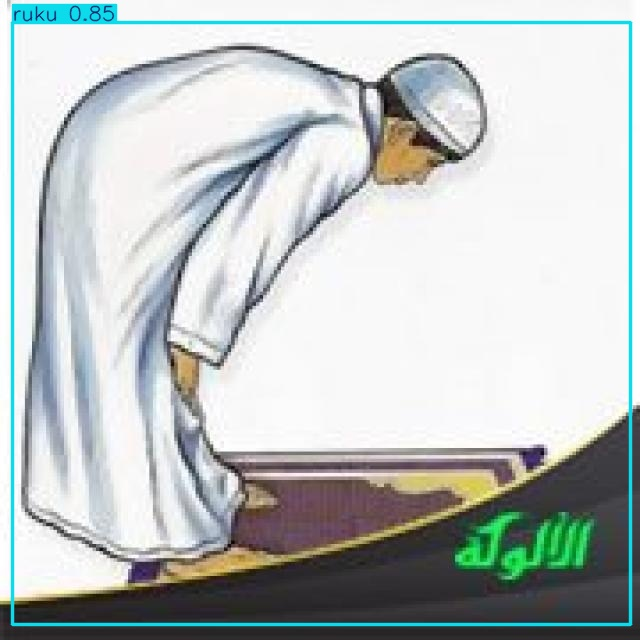

In [18]:
from IPython.display import Image, clear_output
import torch

Image(filename='/kaggle/working/runs/detect/predict/ruku23_jpg.rf.a05c01f14c22c0ac53aafdd998c14ee2.jpg', width=600)